In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

### Scenario
Believe that an asset price process $S = (S_t)_{t \geq 0} $ follows the Black-Scholes model.  
- The asset’s current price is \$ 10.  
- Just sold 10,000 units of an at-the-money 1/4 year (= 63 days) call on this asset, referred to as option g.  
- May trade:
  - **An at-the-money call with maturity 0.3 year** (option **h**).
  - The stock.
  - The bank account.
- Transaction costs:
  - \$ 0.005 per share on equity transactions.  
  - \$ 0.005 per option on option transactions.
- Only integer quantities of stocks and options may be traded.

**Model Parameters:**
- $ \mu = 10% $ (drift).
- $ \sigma = 25% $ (volatility).
- $r = 5% $ (risk-free rate).  

We hedge daily.

In [2]:
# Parameters
S0 = 10                # Initial asset price
K = 10                 # Strike price
r = 0.05               # Risk-free rate
sigma = 0.25           # Volatility
T = 63 / 252           # Time to maturity (63 trading days)
mu_values = [0.05, 0.10, 0.15]  # Drift values for comparison
n_paths = 5000         # Number of simulated paths
dt = 1 / 252           # Time step (daily)
n_steps = int(T / dt)  # Number of time steps
transaction_cost = 0.005
num_g = 10000

# Question 1
Compare the profit and loss distribution assuming you Delta hedge and when you DeltaGamma hedge using 5,000 simulated paths. How do they vary as µ varies?

## Define the Black-Scholes Model
Black-Scholes formula for asset price dynamics:
$ dS_t = \mu S_t dt + \sigma S_t dW_t $
where:
- $S_t$ is the asset price at time t.
- $\mu$ is the drift.
- $\sigma$ is the volatility.
- $dW_t$ is the Wiener process.

---

## Simulate Asset Price Paths
1. Use a discretized form of the Black-Scholes model:
   $ S_{t+\Delta t} = S_t \exp\left((\mu - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t} Z_t\right) $  
   where $Z_t$ are standard normal random variables.

2. Generate 5,000 simulated paths for the asset price $S_t$ over the 63-day horizon using different values of $\mu$ (e.g., 5%, 10%, 15%, etc.).


In [3]:
from scipy.stats import norm
import numpy as np

def bsm_call_price(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes-Merton price of a European call option.
    Parameters:
        S: Initial stock price.
        K: Strike price.
        T: Time to maturity (in years).
        r: Risk-free interest rate.
        sigma: Volatility of the underlying asset.
    Returns:
        Call option price.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


In [4]:
# Simulate asset price paths
def simulate_asset_paths(S0, mu, sigma, T, dt, n_steps, n_paths):
    Z = np.random.normal(0, 1, (n_steps, n_paths))
    S = np.zeros((n_steps + 1, n_paths))
    S[0] = S0
    for t in range(1, n_steps + 1):
        S[t] = S[t - 1] * np.exp((mu - sigma**2 / 2) * dt + sigma * np.sqrt(dt) * Z[t - 1])
    S_df = pd.DataFrame(S, columns=[f'Path {i}' for i in range(1, n_paths + 1)])
    time_df = pd.DataFrame(list(S_df.index), columns=['Time Step'])
    time_df["Time Stamp"] = time_df['Time Step'] * dt
    time_df["Time to Maturity"] = T - time_df["Time Stamp"]
    return S_df, time_df

sim_path_df, time_df = simulate_asset_paths(S0, mu_values[1], sigma, T, dt, n_steps, n_paths)
sim_path_df.head()

,Path 1,Path 2,Path 3,Path 4,Path 5,Path 6,Path 7,Path 8,Path 9,Path 10,...,Path 4991,Path 4992,Path 4993,Path 4994,Path 4995,Path 4996,Path 4997,Path 4998,Path 4999,Path 5000
0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
1,10.243388,10.099452,9.845027,9.855383,9.863932,10.214327,9.953136,10.361354,10.145167,10.191628,...,10.054448,9.987262,9.984806,10.074810,10.030818,10.198292,10.097250,10.141899,10.039260,10.086929
2,10.107715,10.286578,9.805963,9.816499,9.684197,10.278741,10.128698,10.402761,10.100089,10.435002,...,10.058053,10.285781,9.976878,10.248464,10.162019,10.249693,10.240024,10.346226,9.992019,10.087652
3,10.047399,10.120434,9.944094,9.624014,9.699204,10.363151,10.278467,10.323324,10.133594,10.458193,...,10.183135,10.398074,10.117717,10.180109,9.996723,10.239093,10.000138,10.590332,9.867913,10.250241
4,10.144396,10.182773,9.944990,9.804464,9.688571,10.237758,10.349450,10.339651,10.252685,10.517702,...,10.050154,10.431071,10.122471,10.160523,10.058061,10.415142,9.872966,10.522630,9.786107,10.073590


In [5]:
time_df

,Time Step,Time Stamp,Time to Maturity
0,0,0.000000,0.250000
1,1,0.003968,0.246032
2,2,0.007937,0.242063
3,3,0.011905,0.238095
4,4,0.015873,0.234127
...,...,...,...
59,59,0.234127,0.015873
60,60,0.238095,0.011905
61,61,0.242063,0.007937
62,62,0.246032,0.003968


## Implement Delta and Delta-Gamma Hedging
1. **Delta Hedging**:
   - Delta $ \Delta $ of the sold option g using the Black-Scholes formula:  
     $ \Delta = \Phi (d_1) $  
     where:  $ d_1 = \frac{\ln(S/K) + (r + \sigma^2/2)(T-t)}{\sigma \sqrt{(T-t)}} $
     

2. **Delta-Gamma Hedging**:
   - Need both Delta $ \Delta $ and Gamma $ \Gamma $:  
     $ \Gamma = \frac{\phi(d_1)}{S\sigma\sqrt{(T-t)}} $
   - Use the second traded **option h** to hedge Gamma.
   - Solve for the required positions in h and the stock to hedge both Delta and Gamma.

3. **Account for transaction costs for both Delta and Delta-Gamma hedging**:
   - \$ 0.005 per share on equity transactions.
   - \$ 0.005 per option on option transactions.

In [6]:
# Black-Scholes formulas for Delta and Gamma
def black_scholes_d1(S, T_vec, K, r, sigma):
    """
    Calculate d1 for Black-Scholes model using vectorized operations.
    S: DataFrame of asset prices (n_steps x n_paths)
    T: Time-to-maturity vector (n_steps x 1)
    K: Strike price (scalar)
    r: Risk-free rate (scalar)
    sigma: Volatility (scalar)
    """
    d1 = S.copy()
    T_array = T_vec.to_numpy()  # Ensure T is a NumPy array
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T_array) / (sigma * np.sqrt(T_array))
    return d1

def black_scholes_delta(S, T_vec, K, r, sigma):
    """
    Calculate Delta for Black-Scholes model and return as a DataFrame.
    S: DataFrame of asset prices (n_steps x n_paths)
    T: DataFrame of time-to-maturity (n_steps x 1)
    K: Strike price (scalar)
    r: Risk-free rate (scalar)
    sigma: Volatility (scalar)
    """
    d1 = black_scholes_d1(S, T_vec, K, r, sigma)
    delta_array = norm.cdf(d1)  # Calculate Delta as a NumPy array
    delta_df = pd.DataFrame(delta_array, index=S.index, columns=S.columns)  # Convert back to DataFrame
    return delta_df

def black_scholes_gamma(S, T_vec, K, r, sigma):
    """
    Calculate Gamma for Black-Scholes model using vectorized operations.
    S: DataFrame of asset prices (n_steps x n_paths)
    T: DataFrame of time-to-maturity (n_steps x 1)
    K: Strike price (scalar)
    r: Risk-free rate (scalar)
    sigma: Volatility (scalar)
    """
    d1 = black_scholes_d1(S, T_vec, K, r, sigma)
    T_array = T_vec.to_numpy()  # Ensure T is a NumPy array
    return norm.pdf(d1) / (S * sigma * np.sqrt(T_array))

## Delta Hedging (at each time step)

$N_s \Delta S + N_B \Delta B + N_g \Delta g = 0$ \
$N_s(1) + N_B(0) - 10000*N_g = 0$ \
$N_s = 10000 \Delta g$

## Delta - Gamma Hedging (at each time step)
$N_s(0) + N_B(0) - 10000 \cdot Γ^g + N_h \cdot Γ^h = 0$ \
$N_h \cdot Γ^h = 10000 \cdot Γ^g$ \
$N_h = 10000 \cdot \frac{Γ^g}{Γ^h}$ \

$N_s \Delta S + N_B \Delta B + N_g \Delta g + N_h \Delta h = 0$ \
$N_s(1) + 0 - 10000 \Delta g + N_h \Delta h = 0$ \
$N_s = 10000 \Delta g - N_h \Delta h$ \
$\implies N_s = 10000 \Delta g - 10000 \cdot \frac{Γ^g}{Γ^h} \Delta h$


In [7]:
def delta_hedging(delta_g, num_g):
    """
    Delta hedging to calculate the number of shares (N_s) at each time step.
    Parameters:
        delta_g: Array of g Delta values for each time step.
        num_g: Number of g options sold.
    Returns:
        ns_shares: Array of number of shares at each time step.
    """
    ns_shares = num_g * delta_g
    return ns_shares

def delta_gamma_hedging(delta_g, gammas_g, gammas_h, delta_h, num_g):
    """
    Delta-Gamma hedging to calculate the number of shares (N_s) at each time step.
    Parameters:
        delta_g: Array of Delta values for option g.
        gammas_g: Array of Gamma values for option g.
        gammas_h: Array of Gamma values for hedging instrument h.
        delta_h: Array of Delta values for hedging instrument h.
        num_g: Number of g options sold.
    Returns:
        ns_shares: Array of number of shares at each time step.
        num_h: Array of number of units of hedging instrument h at each time step.
    """
    num_h = num_g * (gammas_g / gammas_h)
    ns_shares = num_g * delta_g - num_h * delta_h
    return ns_shares, num_h


## delta_hedging_rebalance function

In [8]:
def delta_hedging_rebalance(
    S, K, T, r, sigma, delta_g, num_g, transaction_cost
):
    """
    Delta Hedging: Rebalance portfolio daily using only Delta hedging.
    Parameters:
        S: DataFrame of simulated stock prices (n_steps x n_paths).
        K: Strike price of the g option.
        T: Time to maturity of the g option (in years).
        r: Risk-free interest rate.
        sigma: Volatility of the underlying asset.
        delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
        num_g: Number of g options sold.
        transaction_cost: Cost per unit for stock transactions.
    Returns:
        pnl: Array of P&L values for each path.
    """
    n_steps, n_paths = S.shape
    dt = 1 / 252  # Daily time step
    pnl = np.zeros(n_paths)

    for i in range(n_paths):
        # Calculate initial value of the g option using BSM
        S_0 = S.iloc[0, i]
        g_option_value = bsm_call_price(S_0, K, T, r, sigma)

        # Initial portfolio setup
        N_s_0 = int(delta_hedging(delta_g.iloc[0, i], num_g))
        bank = num_g * g_option_value - N_s_0 * S_0
        stock_position = N_s_0

        for t in range(1, n_steps-1):
            S_t = S.iloc[t - 1, i]
            S_next = S.iloc[t, i]
            time_step = dt

            # Accumulate interest
            bank *= np.exp(r * dt)

            # Rebalance
            N_s_new = int(delta_hedging(delta_g.iloc[t, i], num_g))
            stock_change = stock_position - N_s_new
            bank += stock_change * S_next - abs(stock_change) * transaction_cost
            stock_position = N_s_new

        # Final portfolio value
        final_stock_value = stock_position * S.iloc[-1, i]
        final_option_payoff = num_g * max(S.iloc[-1, i] - K, 0)  # Option payoff

        # Accumulate final interest for the bank balance
        bank *= np.exp(r * dt)

        pnl[i] = bank + final_stock_value - final_option_payoff

    return pnl


## PnL Plot for Delta Hedging

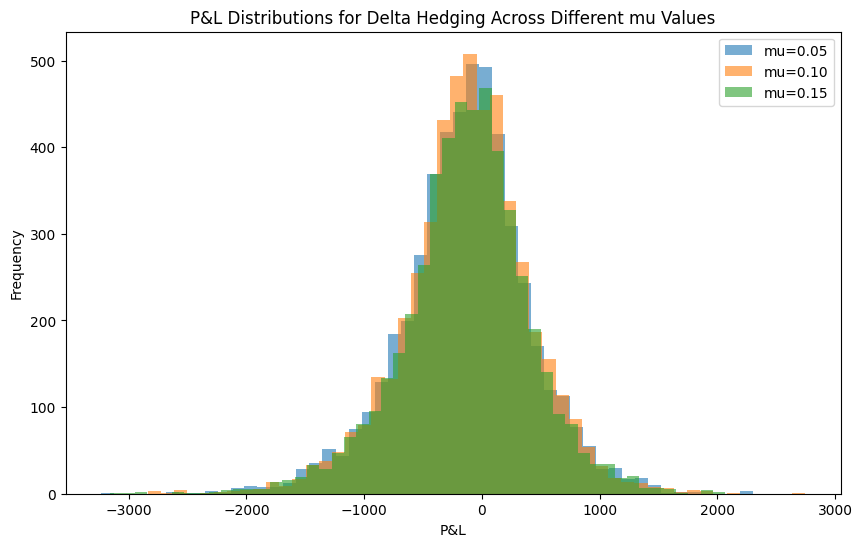

In [11]:
import matplotlib.pyplot as plt

# Prepare to store PnL distributions for each mu
pnl_results_delta = {}

# Loop over all mu values
for mu in mu_values:
    # Simulate asset paths for the current mu
    sim_path_df, time_df = simulate_asset_paths(S0, mu, sigma, T, dt, n_steps, n_paths)

    # Create T_vec_g
    T_vec_g = time_df["Time to Maturity"]
    T_vec_g = pd.DataFrame(np.tile(T_vec_g.values, (n_paths, 1)).T, index=sim_path_df.index, columns=sim_path_df.columns)

    # Compute deltas for g options
    deltas_g = black_scholes_delta(sim_path_df, T_vec_g, K, r, sigma)

    # Perform delta hedging and compute PnL
    pnl_delta = delta_hedging_rebalance(
        S=sim_path_df,
        K=K,
        T=T,
        r=r,
        sigma=sigma,
        delta_g=deltas_g,
        num_g=num_g,
        transaction_cost=transaction_cost
    )

    # Store results for plotting
    pnl_results_delta[mu] = pnl_delta

# Plot PnL distributions for all mu values
plt.figure(figsize=(10, 6))
for mu, pnl in pnl_results_delta.items():
    plt.hist(pnl, bins=50, alpha=0.6, label=f"mu={mu:.2f}")

plt.xlabel("P&L")
plt.ylabel("Frequency")
plt.title("P&L Distributions for Delta Hedging Across Different mu Values")
plt.legend()
plt.show()


In [12]:
import pandas as pd
from scipy.stats import skew

# Prepare to store summary statistics for each mu
summary_stats = []

# Loop over each mu and calculate summary statistics
for mu, pnl in pnl_results_delta.items():
    stats = {
        'mu': mu,
        'mean': pnl.mean(),
        'variance': pnl.var(),
        'skewness': skew(pnl)
    }
    summary_stats.append(stats)

# Convert to a DataFrame for a clean display
summary_stats_df_delta = pd.DataFrame(summary_stats)
summary_stats_df_delta

,mu,mean,variance,skewness
0,0.05,-137.648522,301406.970945,-0.256301
1,0.10,-123.570916,294346.607910,-0.279991
2,0.15,-133.697097,299748.171451,-0.352619


## delta_gamma_hedging_rebalance function

In [9]:
def delta_gamma_hedging_rebalance(
    S, K_g, T_g, K_h, T_h, r, sigma, delta_g, gamma_g, gamma_h, delta_h, num_g, transaction_cost
):
    """
    Delta-Gamma Hedging: Rebalance portfolio daily using Delta-Gamma hedging.
    Parameters:
        S: DataFrame of simulated stock prices (n_steps x n_paths).
        K_g: Strike price of the g option.
        T_g: Time to maturity of the g option (in years).
        K_h: Strike price of the h option.
        T_h: Time to maturity of the h option (in years).
        r: Risk-free interest rate.
        sigma: Volatility of the underlying asset.
        delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
        gamma_g: DataFrame of Gamma values for option g (n_steps x n_paths).
        gamma_h: DataFrame of Gamma values for hedging instrument h (n_steps x n_paths).
        delta_h: DataFrame of Delta values for hedging instrument h (n_steps x n_paths).
        num_g: Number of g options sold.
        transaction_cost: Cost per unit for stock and option transactions.
    Returns:
        pnl: Array of P&L values for each path.
    """
    n_steps, n_paths = S.shape
    dt = 1 / 252  # Daily time step
    pnl = np.zeros(n_paths)

    for i in range(n_paths):
        # Calculate initial value of g and h options using BSM
        S_0 = S.iloc[0, i]
        g_option_value = bsm_call_price(S_0, K_g, T_g, r, sigma)
        h_option_value = bsm_call_price(S_0, K_h, T_h, r, sigma)

        # Initial portfolio setup
        N_s_0, N_h_0 = delta_gamma_hedging(
            delta_g.iloc[0, i], gamma_g.iloc[0, i], gamma_h.iloc[0, i], delta_h.iloc[0, i], num_g
        )
        N_s_0 = int(N_s_0)
        N_h_0 = int(N_h_0)

        # Initial bank value
        bank = num_g * g_option_value - N_s_0 * S_0 - N_h_0 * h_option_value
        stock_position = N_s_0
        hedge_position = N_h_0

        # Rebalance for all steps except the final one
        for t in range(1, n_steps - 1):
            S_t = S.iloc[t - 1, i]
            S_next = S.iloc[t, i]

            T_h_t = T_h - t * dt  # Update time to maturity for h option

            # Recalculate h option value at the new time step
            h_option_value = bsm_call_price(S_next, K_h, T_h_t, r, sigma)

            # Accumulate interest
            bank *= np.exp(r * dt)

            # Rebalance
            N_s_new, N_h_new = delta_gamma_hedging(
                delta_g.iloc[t, i], gamma_g.iloc[t, i], gamma_h.iloc[t, i], delta_h.iloc[t, i], num_g
            )
            N_s_new = int(N_s_new)
            N_h_new = int(N_h_new)

            # Update bank for stock transactions
            stock_change = stock_position - N_s_new
            bank += stock_change * S_next - abs(stock_change) * transaction_cost
            stock_position = N_s_new

            # Update bank for hedging instrument transactions
            hedge_change = hedge_position - N_h_new
            bank += hedge_change * h_option_value - abs(hedge_change) * transaction_cost
            hedge_position = N_h_new

        # Final step: Compute portfolio value without rebalancing
        S_T = S.iloc[-1, i]  # Final stock price
        final_stock_value = stock_position * S_T
        final_h_option_payoff = hedge_position * max(S_T - K_h, 0)  # Payoff for h option
        final_option_payoff = num_g * max(S_T - K_g, 0)  # Payoff for g option

        # Accumulate final interest for the bank balance
        bank *= np.exp(r * dt)

        # Compute the total P&L
        pnl[i] = bank + final_stock_value + final_h_option_payoff - final_option_payoff

    return pnl


## PnL Plot for Delta-Gamma Hedging

In [11]:
# Define parameters
K_g = K_h = K       # Strike price for g, h option
T_g = 63/252 # Time to maturity for g option (63 days)
T_h = 0.3      # Time to maturity for h option (in years)

In [ ]:
# T_vec_g = time_df["Time to Maturity"]
# # Broadcast T_vec_g to match sim_path_df
# T_vec_g = pd.DataFrame(np.tile(T_vec_g.values, (n_paths, 1)).T, index=sim_path_df.index, columns=sim_path_df.columns)
# T_vec_g

In [ ]:
# T_vec_h = T_h - np.arange(n_steps+1) * dt  # 64 steps
# T_vec_h

In [ ]:
# # Broadcast T_vec_h
# T_vec_h = np.tile(T_vec_h[:, None], (1, n_paths))  # Broadcast to (64, 5000)
# T_vec_h = pd.DataFrame(T_vec_h, index=sim_path_df.index, columns=sim_path_df.columns)
# T_vec_h

In [ ]:
# deltas_g=black_scholes_delta(sim_path_df, T_vec_g, K_g, r, sigma)
# deltas_h=black_scholes_delta(sim_path_df, T_vec_h, K_h, r, sigma)

# gammas_g= black_scholes_gamma(sim_path_df, T_vec_g, K_g, r, sigma)
# gammas_h= black_scholes_gamma(sim_path_df, T_vec_h, K_h, r, sigma)

# # Simulate P&L
# pnl_delta_gamma = delta_gamma_hedging_rebalance(
#     S=sim_path_df,
#     K_g=K_g,
#     T_g=T_g,
#     K_h=K_h,
#     T_h=T_h,
#     r=r,
#     sigma=sigma,
#     delta_g=deltas_g,
#     gamma_g=gammas_g,
#     gamma_h=gammas_h,
#     delta_h=deltas_h,
#     num_g = num_g,
#     transaction_cost = transaction_cost
# )

# # Visualization
# import matplotlib.pyplot as plt
# plt.hist(pnl_delta_gamma, bins=50, alpha=0.7, label="Delta-Gamma Hedging")
# plt.xlabel("P&L")
# plt.ylabel("Frequency")
# plt.legend()
# plt.title("P&L Distribution for Delta-Gamma Hedging")
# plt.show()


      Path 1    Path 2    Path 3    Path 4    Path 5    Path 6    Path 7  \
0   0.286767  0.286767  0.286767  0.286767  0.286767  0.286767  0.286767   
1   0.273701  0.281299  0.282853  0.295663  0.289374  0.302025  0.296572   
2   0.282742  0.280479  0.299178  0.303647  0.302363  0.293285  0.299826   
3   0.281434  0.274857  0.297755  0.305530  0.303850  0.299068  0.296197   
4   0.276184  0.296716  0.299728  0.290246  0.304832  0.293166  0.279685   
..       ...       ...       ...       ...       ...       ...       ...   
59  0.606151  0.026114  0.539787  0.622798  0.001186  0.310500  0.424504   
60  0.610815  0.039096  0.484447  0.644901  0.000768  0.398595  0.359453   
61  0.636380  0.037980  0.616104  0.635008  0.000397  0.487068  0.195497   
62  0.665081  0.054941  0.669096  0.608146  0.000053  0.541422  0.129355   
63  0.582765  0.021977  0.621295  0.582346  0.000014  0.494462  0.158991   

      Path 8    Path 9   Path 10  ...  Path 4991  Path 4992  Path 4993  \
0   0.286767 

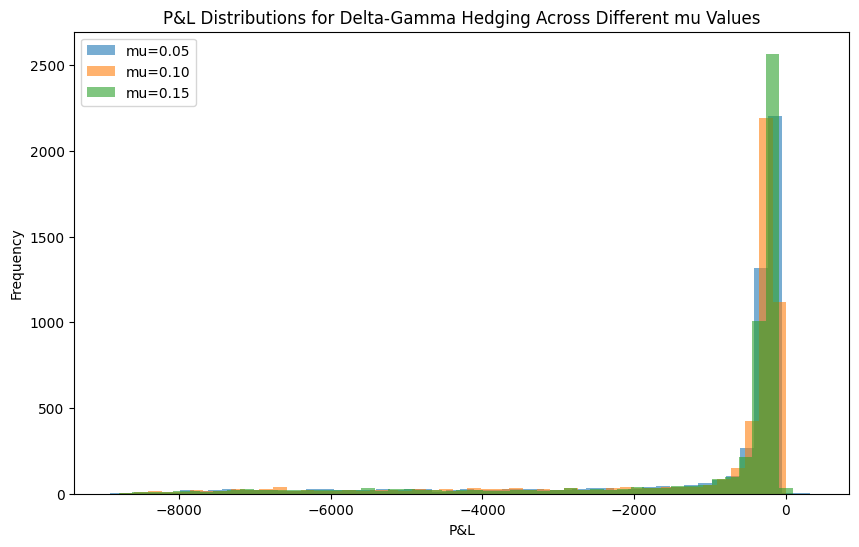

In [13]:
import matplotlib.pyplot as plt

# Prepare to store PnL distributions for each mu
pnl_results = {}

# Loop over all mu values
for mu in mu_values:
    # Simulate asset paths for the current mu
    sim_path_df, time_df = simulate_asset_paths(S0, mu, sigma, T, dt, n_steps, n_paths)

    # Create T_vec_g and broadcast to match sim_path_df
    T_vec_g = time_df["Time to Maturity"]
    T_vec_g = pd.DataFrame(np.tile(T_vec_g.values, (n_paths, 1)).T, index=sim_path_df.index, columns=sim_path_df.columns)

    # Create T_vec_h for the h option and broadcast to match sim_path_df
    T_vec_h = T_h - np.arange(n_steps + 1) * dt  # Ensure 64 steps
    T_vec_h = np.tile(T_vec_h[:, None], (1, n_paths))  # Broadcast to match (64, 5000)
    T_vec_h = pd.DataFrame(T_vec_h, index=sim_path_df.index, columns=sim_path_df.columns)

    # Compute deltas and gammas for g and h options
    deltas_g = black_scholes_delta(sim_path_df, T_vec_g, K_g, r, sigma)
    deltas_h = black_scholes_delta(sim_path_df, T_vec_h, K_h, r, sigma)

    gammas_g = black_scholes_gamma(sim_path_df, T_vec_g, K_g, r, sigma)
    gammas_h = black_scholes_gamma(sim_path_df, T_vec_h, K_h, r, sigma)

    print(gammas_h)

    # Perform delta-gamma hedging and compute PnL
    pnl_delta_gamma = delta_gamma_hedging_rebalance(
        S=sim_path_df,
        K_g=K_g,
        T_g=T_g,
        K_h=K_h,
        T_h=T_h,
        r=r,
        sigma=sigma,
        delta_g=deltas_g,
        gamma_g=gammas_g,
        gamma_h=gammas_h,
        delta_h=deltas_h,
        num_g=num_g,
        transaction_cost=transaction_cost
    )

    # Store results for plotting
    pnl_results[mu] = pnl_delta_gamma

# Plot PnL distributions for all mu values
plt.figure(figsize=(10, 6))
for mu, pnl in pnl_results.items():
    plt.hist(pnl, bins=50, alpha=0.6, label=f"mu={mu:.2f}")

plt.xlabel("P&L")
plt.ylabel("Frequency")
plt.title("P&L Distributions for Delta-Gamma Hedging Across Different mu Values")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import skew

# Prepare to store summary statistics for each mu
summary_stats = []

# Loop over each mu and calculate summary statistics
for mu, pnl in pnl_results.items():
    stats = {
        'mu': mu,
        'mean': pnl.mean(),
        'variance': pnl.var(),
        'skewness': skew(pnl)
    }
    summary_stats.append(stats)

# Convert to a DataFrame for a clean display
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,mu,mean,variance,skewness
0,0.05,-1011.712920,3.271327e+06,-2.463603
1,0.10,-1014.742693,3.283857e+06,-2.459909
2,0.15,-983.627860,3.186229e+06,-2.571676


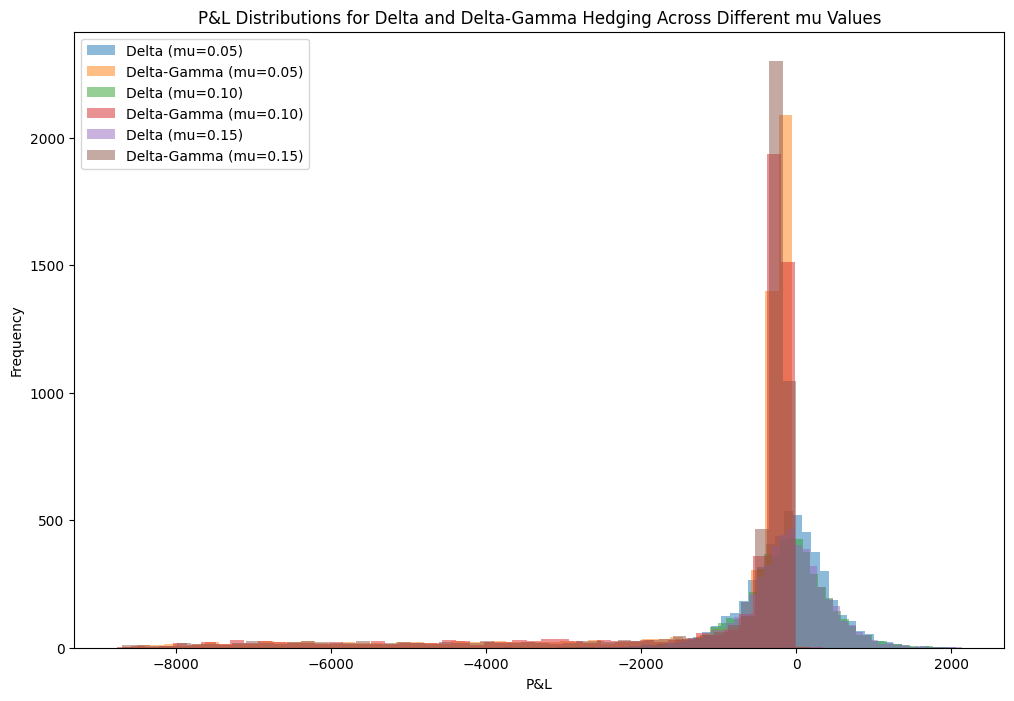

In [ ]:
import matplotlib.pyplot as plt

# Plot Delta and Delta-Gamma PnL distributions for each mu value
plt.figure(figsize=(12, 8))

for mu in pnl_results_delta.keys():  # Loop through each mu value
    plt.hist(pnl_results_delta[mu], bins=50, alpha=0.5, label=f"Delta (mu={mu:.2f})")
    plt.hist(pnl_results[mu], bins=50, alpha=0.5, label=f"Delta-Gamma (mu={mu:.2f})")

plt.xlabel("P&L")
plt.ylabel("Frequency")
plt.title("P&L Distributions for Delta and Delta-Gamma Hedging Across Different mu Values")
plt.legend()
plt.show()


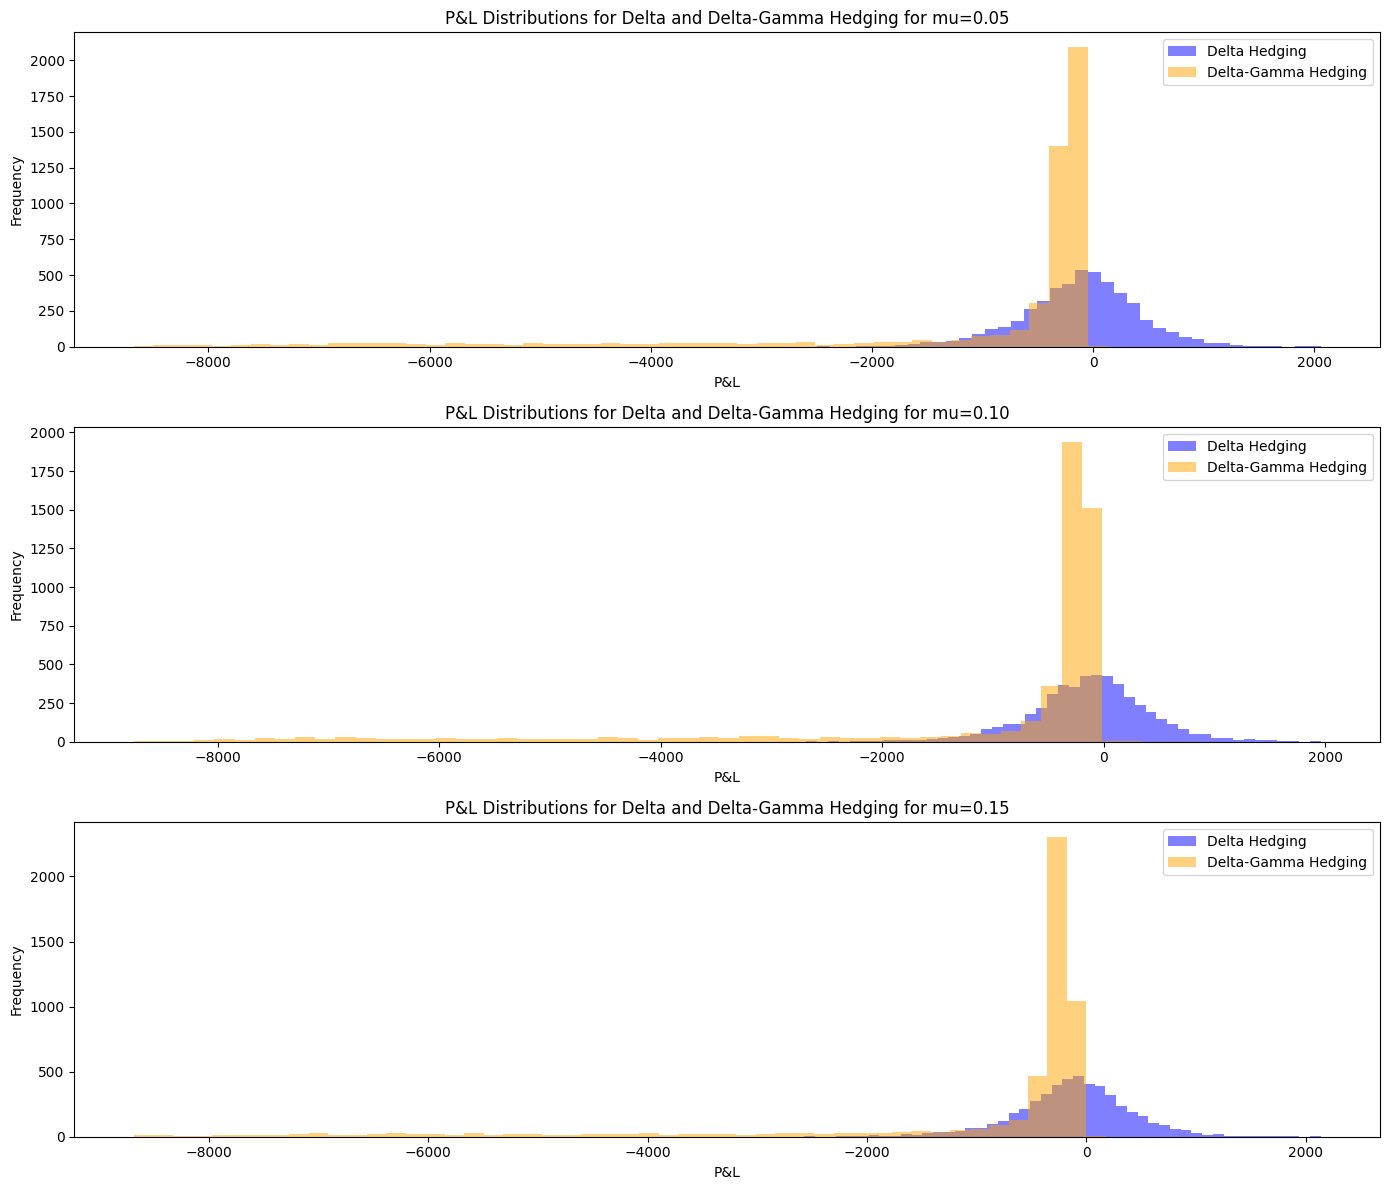

In [ ]:
plt.figure(figsize=(14, 12))

# Create a subplot for each mu value
for idx, mu in enumerate(pnl_results_delta.keys()):
    plt.subplot(len(pnl_results_delta), 1, idx + 1)
    plt.hist(pnl_results_delta[mu], bins=50, alpha=0.5, label="Delta Hedging", color='blue')
    plt.hist(pnl_results[mu], bins=50, alpha=0.5, label="Delta-Gamma Hedging", color='orange')
    plt.title(f"P&L Distributions for Delta and Delta-Gamma Hedging for mu={mu:.2f}")
    plt.xlabel("P&L")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


# Question 2
Plot the position you hold in the asset and the hedging option (when Delta-Gamma hedging) for two sample paths – one that ends in the money and one that ends out-of-the money. Set the random number seed so that the asset sample paths when Delta and Delta-Gamma hedging are the same – so you can compare them.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate asset paths
sim_path_df, time_df = simulate_asset_paths(S0, mu_values[1], sigma, T, dt, n_steps, n_paths)

# Identify ITM and OTM paths
final_prices = sim_path_df.iloc[-1, :]
itm_path_idx = final_prices[final_prices > K_g].index[0]  # First ITM path
otm_path_idx = final_prices[final_prices <= K_g].index[0]  # First OTM path


## Delta hedging

In [ ]:
def delta_hedging_rebalance_new(
    S, K, T, r, sigma, delta_g, num_g, transaction_cost, return_positions=False
):
    """
    Delta Hedging: Rebalance portfolio daily using only Delta hedging.
    Parameters:
        S: DataFrame of simulated stock prices (n_steps x n_paths).
        K: Strike price of the g option.
        T: Time to maturity of the g option (in years).
        r: Risk-free interest rate.
        sigma: Volatility of the underlying asset.
        delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
        num_g: Number of g options sold.
        transaction_cost: Cost per unit for stock transactions.
        return_positions: If True, returns the positions (N_s) alongside the PnL.
    Returns:
        pnl: Array of P&L values for each path.
        (optional) Ns_positions: Array of positions in the asset.
    """
    n_steps, n_paths = S.shape
    dt = 1 / 252  # Daily time step
    pnl = np.zeros(n_paths)

    # Initialize list to track positions
    if return_positions:
        Ns_positions = np.zeros((n_steps, n_paths))

    for i in range(n_paths):
        # Calculate initial value of the g option using BSM
        S_0 = S.iloc[0, i]
        g_option_value = bsm_call_price(S_0, K, T, r, sigma)

        # Initial portfolio setup
        N_s_0 = int(delta_hedging(delta_g.iloc[0, i], num_g))
        bank = num_g * g_option_value - N_s_0 * S_0
        stock_position = N_s_0

        # Record initial position
        if return_positions:
            Ns_positions[0, i] = N_s_0

        for t in range(1, n_steps - 1):
            S_t = S.iloc[t - 1, i]
            S_next = S.iloc[t, i]

            # Accumulate interest
            bank *= np.exp(r * dt)

            # Rebalance
            N_s_new = int(delta_hedging(delta_g.iloc[t, i], num_g))
            stock_change = stock_position - N_s_new
            bank += stock_change * S_next - abs(stock_change) * transaction_cost
            stock_position = N_s_new

            # Record positions
            if return_positions:
                Ns_positions[t, i] = stock_position

        # Final portfolio value
        final_stock_value = stock_position * S.iloc[-1, i]
        final_option_payoff = num_g * max(S.iloc[-1, i] - K, 0)  # Option payoff

        # Accumulate final interest for the bank balance
        bank *= np.exp(r * dt)

        pnl[i] = bank + final_stock_value - final_option_payoff

    if return_positions:
        return pnl, Ns_positions
    return pnl


In [ ]:
# Perform Delta Hedging for ITM Path
pnl_itm, Ns_itm = delta_hedging_rebalance_new(
    S=sim_path_df[[itm_path_idx]],  # Single path as DataFrame
    K=K,
    T=T,
    r=r,
    sigma=sigma,
    delta_g=deltas_g[[itm_path_idx]],
    num_g=num_g,
    transaction_cost=transaction_cost,
    return_positions=True  # Track positions
)

# Perform Delta Hedging for OTM Path
pnl_otm, Ns_otm = delta_hedging_rebalance_new(
    S=sim_path_df[[otm_path_idx]],  # Single path as DataFrame
    K=K,
    T=T,
    r=r,
    sigma=sigma,
    delta_g=deltas_g[[otm_path_idx]],
    num_g=num_g,
    transaction_cost=transaction_cost,
    return_positions=True
)


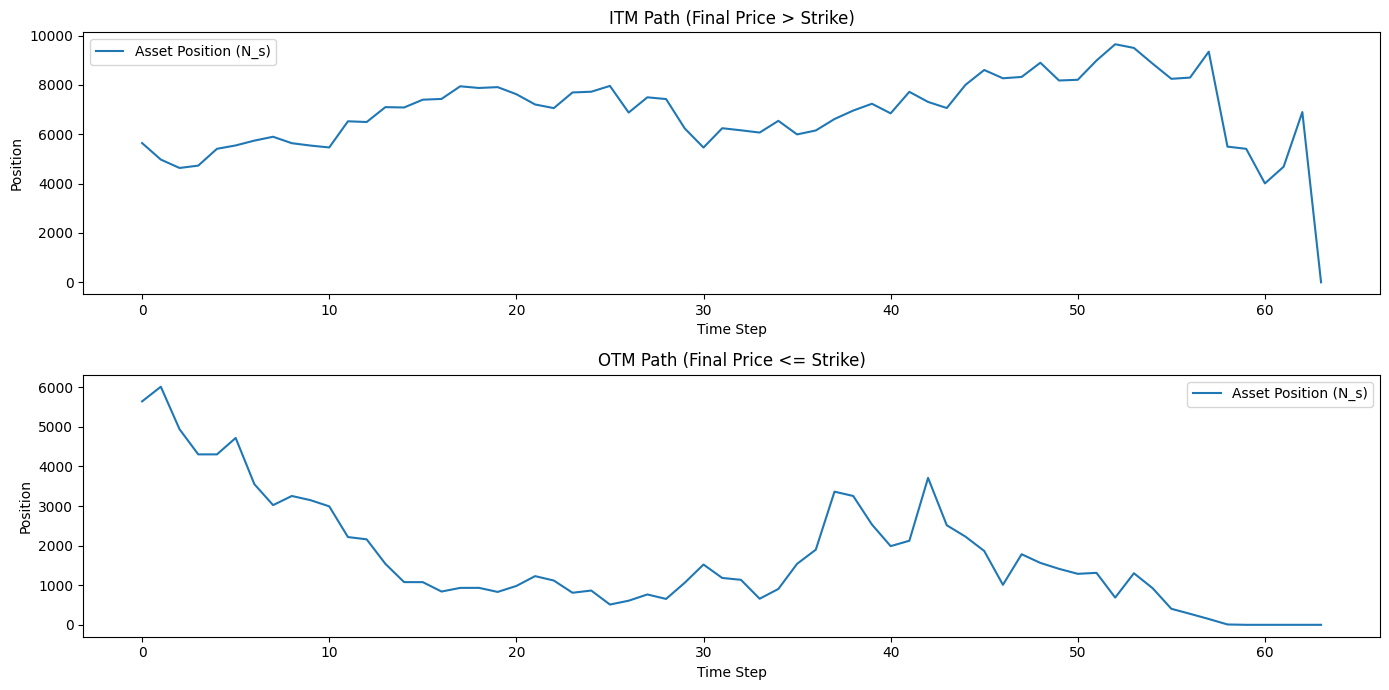

In [ ]:
time_steps = np.arange(len(Ns_itm))

plt.figure(figsize=(14, 7))

# ITM Path
plt.subplot(2, 1, 1)
plt.plot(time_steps, Ns_itm, label="Asset Position (N_s)")
plt.title("ITM Path (Final Price > Strike)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()

# OTM Path
plt.subplot(2, 1, 2)
plt.plot(time_steps, Ns_otm, label="Asset Position (N_s)")
plt.title("OTM Path (Final Price <= Strike)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()

plt.tight_layout()
plt.show()


## Delta gamma hedging

In [ ]:
def delta_gamma_hedging_rebalance_new(
    S, K_g, T_g, K_h, T_h, r, sigma, delta_g, gamma_g, gamma_h, delta_h, num_g, transaction_cost, return_positions=False
):
    """
    Delta-Gamma Hedging: Rebalance portfolio daily using Delta-Gamma hedging.
    Parameters:
        S: DataFrame of simulated stock prices (n_steps x n_paths).
        K_g: Strike price of the g option.
        T_g: Time to maturity of the g option (in years).
        K_h: Strike price of the h option.
        T_h: Time to maturity of the h option (in years).
        r: Risk-free interest rate.
        sigma: Volatility of the underlying asset.
        delta_g: DataFrame of Delta values for option g (n_steps x n_paths).
        gamma_g: DataFrame of Gamma values for option g (n_steps x n_paths).
        gamma_h: DataFrame of Gamma values for hedging instrument h (n_steps x n_paths).
        delta_h: DataFrame of Delta values for hedging instrument h (n_steps x n_paths).
        num_g: Number of g options sold.
        transaction_cost: Cost per unit for stock and option transactions.
        return_positions: If True, returns the positions (N_s and N_h) alongside the PnL.
    Returns:
        pnl: Array of P&L values for each path.
        (optional) Ns_positions, Nh_positions: Arrays of positions in the asset and hedging option.
    """
    n_steps, n_paths = S.shape
    dt = 1 / 252  # Daily time step
    pnl = np.zeros(n_paths)

    # Initialize lists to track positions over time
    if return_positions:
        Ns_positions = np.zeros((n_steps, n_paths))
        Nh_positions = np.zeros((n_steps, n_paths))

    for i in range(n_paths):
        # Calculate initial value of g and h options using BSM
        S_0 = S.iloc[0, i]
        g_option_value = bsm_call_price(S_0, K_g, T_g, r, sigma)
        h_option_value = bsm_call_price(S_0, K_h, T_h, r, sigma)

        # Initial portfolio setup
        N_s_0, N_h_0 = delta_gamma_hedging(
            delta_g.iloc[0, i], gamma_g.iloc[0, i], gamma_h.iloc[0, i], delta_h.iloc[0, i], num_g
        )
        N_s_0 = int(N_s_0)
        N_h_0 = int(N_h_0)

        # Record initial positions
        if return_positions:
            Ns_positions[0, i] = N_s_0
            Nh_positions[0, i] = N_h_0

        # Initial bank value
        bank = num_g * g_option_value - N_s_0 * S_0 - N_h_0 * h_option_value
        stock_position = N_s_0
        hedge_position = N_h_0

        # Rebalance for all steps except the final one
        for t in range(1, n_steps - 1):
            S_t = S.iloc[t - 1, i]
            S_next = S.iloc[t, i]

            T_h_t = T_h - t * dt  # Update time to maturity for h option

            # Recalculate h option value at the new time step
            h_option_value = bsm_call_price(S_next, K_h, T_h_t, r, sigma)

            # Accumulate interest
            bank *= np.exp(r * dt)

            # Rebalance
            N_s_new, N_h_new = delta_gamma_hedging(
                delta_g.iloc[t, i], gamma_g.iloc[t, i], gamma_h.iloc[t, i], delta_h.iloc[t, i], num_g
            )
            N_s_new = int(N_s_new)
            N_h_new = int(N_h_new)

            # Update bank for stock transactions
            stock_change = stock_position - N_s_new
            bank += stock_change * S_next - abs(stock_change) * transaction_cost
            stock_position = N_s_new

            # Update bank for hedging instrument transactions
            hedge_change = hedge_position - N_h_new
            bank += hedge_change * h_option_value - abs(hedge_change) * transaction_cost
            hedge_position = N_h_new

            # Record positions
            if return_positions:
                Ns_positions[t, i] = stock_position
                Nh_positions[t, i] = hedge_position

        # Final step: Compute portfolio value without rebalancing
        S_T = S.iloc[-1, i]  # Final stock price
        final_stock_value = stock_position * S_T
        final_h_option_payoff = hedge_position * max(S_T - K_h, 0)  # Payoff for h option
        final_option_payoff = num_g * max(S_T - K_g, 0)  # Payoff for g option

        # Accumulate final interest for the bank balance
        bank *= np.exp(r * dt)

        # Compute the total P&L
        pnl[i] = bank + final_stock_value + final_h_option_payoff - final_option_payoff

    if return_positions:
        return pnl, Ns_positions, Nh_positions
    return pnl


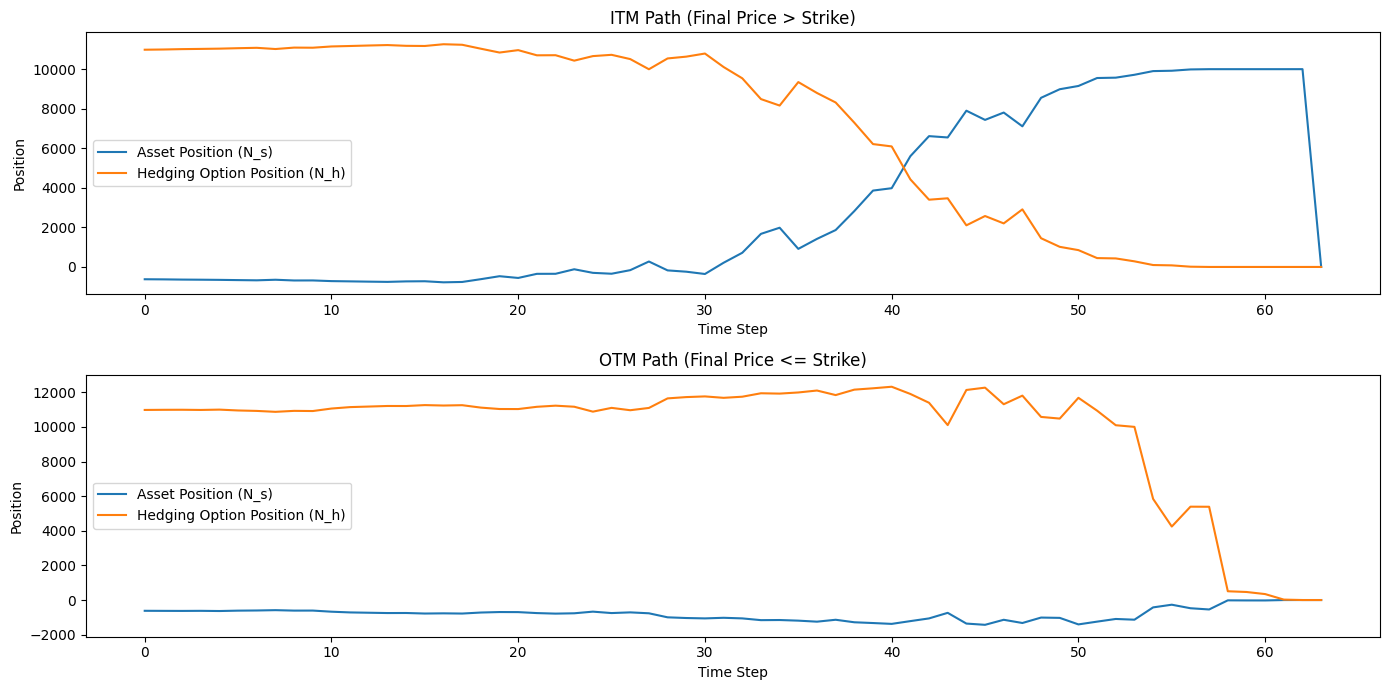

In [ ]:

# Compute deltas and gammas
T_vec_g = time_df["Time to Maturity"]
T_vec_g = pd.DataFrame(np.tile(T_vec_g.values, (n_paths, 1)).T, index=sim_path_df.index, columns=sim_path_df.columns)

T_vec_h = T_h - np.arange(n_steps + 1) * dt
T_vec_h = np.tile(T_vec_h[:, None], (1, n_paths))
T_vec_h = pd.DataFrame(T_vec_h, index=sim_path_df.index, columns=sim_path_df.columns)

deltas_g = black_scholes_delta(sim_path_df, T_vec_g, K_g, r, sigma)
deltas_h = black_scholes_delta(sim_path_df, T_vec_h, K_h, r, sigma)

gammas_g = black_scholes_gamma(sim_path_df, T_vec_g, K_g, r, sigma)
gammas_h = black_scholes_gamma(sim_path_df, T_vec_h, K_h, r, sigma)

# Perform Delta-Gamma Hedging for ITM Path
pnl_itm, Ns_itm, Nh_itm = delta_gamma_hedging_rebalance_new(
    S=sim_path_df[[itm_path_idx]],  # Keep as DataFrame with shape (n_steps, 1)
    K_g=K_g,
    T_g=T_g,
    K_h=K_h,
    T_h=T_h,
    r=r,
    sigma=sigma,
    delta_g=deltas_g[[itm_path_idx]],
    gamma_g=gammas_g[[itm_path_idx]],
    gamma_h=gammas_h[[itm_path_idx]],
    delta_h=deltas_h[[itm_path_idx]],
    num_g=num_g,
    transaction_cost=transaction_cost,
    return_positions=True  # Track positions
)

# Perform Delta-Gamma Hedging for OTM Path
pnl_otm, Ns_otm, Nh_otm = delta_gamma_hedging_rebalance_new(
    S=sim_path_df[[otm_path_idx]],
    K_g=K_g,
    T_g=T_g,
    K_h=K_h,
    T_h=T_h,
    r=r,
    sigma=sigma,
    delta_g=deltas_g[[otm_path_idx]],
    gamma_g=gammas_g[[otm_path_idx]],
    gamma_h=gammas_h[[otm_path_idx]],
    delta_h=deltas_h[[otm_path_idx]],
    num_g=num_g,
    transaction_cost=transaction_cost,
    return_positions=True
)

# Plot Results
time_steps = np.arange(len(Ns_itm))

plt.figure(figsize=(14, 7))

# ITM Path
plt.subplot(2, 1, 1)
plt.plot(time_steps, Ns_itm, label="Asset Position (N_s)")
plt.plot(time_steps, Nh_itm, label="Hedging Option Position (N_h)")
plt.title("ITM Path (Final Price > Strike)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()

# OTM Path
plt.subplot(2, 1, 2)
plt.plot(time_steps, Ns_otm, label="Asset Position (N_s)")
plt.plot(time_steps, Nh_otm, label="Hedging Option Position (N_h)")
plt.title("OTM Path (Final Price <= Strike)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()

plt.tight_layout()
plt.show()


# Question 3
Suppose that the real-world P volatility is σ ∈ {20%, 22%, . . . , 30%}, but you still sold the option using σ = 25%, and hedge assuming that volatility is 25%. Compare again, the Delta and Delta-Gamma hedging cases.

In [ ]:
import matplotlib.pyplot as plt

# Define real-world volatilities
real_volatilities = [0.20, 0.22, 0.24, 0.26, 0.28, 0.30]

# Store results for Delta and Delta-Gamma hedging
delta_pnl_results = {}
delta_gamma_pnl_results = {}

for sigma_real in real_volatilities:
    # Simulate asset paths with real-world volatility
    sim_path_df, time_df = simulate_asset_paths(S0, mu_values[1], sigma_real, T, dt, n_steps, n_paths)

    # Create T_vec_g and T_vec_h
    T_vec_g = time_df["Time to Maturity"]
    T_vec_g = pd.DataFrame(np.tile(T_vec_g.values, (n_paths, 1)).T, index=sim_path_df.index, columns=sim_path_df.columns)
    T_vec_h = T_h - np.arange(n_steps + 1) * dt
    T_vec_h = np.tile(T_vec_h[:, None], (1, n_paths))
    T_vec_h = pd.DataFrame(T_vec_h, index=sim_path_df.index, columns=sim_path_df.columns)

    # Compute deltas and gammas (using assumed sigma = 25%)
    deltas_g = black_scholes_delta(sim_path_df, T_vec_g, K_g, r, 0.25)
    deltas_h = black_scholes_delta(sim_path_df, T_vec_h, K_h, r, 0.25)
    gammas_g = black_scholes_gamma(sim_path_df, T_vec_g, K_g, r, 0.25)
    gammas_h = black_scholes_gamma(sim_path_df, T_vec_h, K_h, r, 0.25)

    # Perform Delta hedging
    delta_pnl = delta_hedging_rebalance(
        S=sim_path_df,
        K=K_g,
        T=T_g,
        r=r,
        sigma=0.25,  # Assumed sigma
        delta_g=deltas_g,
        num_g=num_g,
        transaction_cost=transaction_cost
    )
    delta_pnl_results[sigma_real] = delta_pnl

    # Perform Delta-Gamma hedging
    delta_gamma_pnl = delta_gamma_hedging_rebalance(
        S=sim_path_df,
        K_g=K_g,
        T_g=T_g,
        K_h=K_h,
        T_h=T_h,
        r=r,
        sigma=0.25,  # Assumed sigma
        delta_g=deltas_g,
        gamma_g=gammas_g,
        gamma_h=gammas_h,
        delta_h=deltas_h,
        num_g=num_g,
        transaction_cost=transaction_cost
    )
    delta_gamma_pnl_results[sigma_real] = delta_gamma_pnl


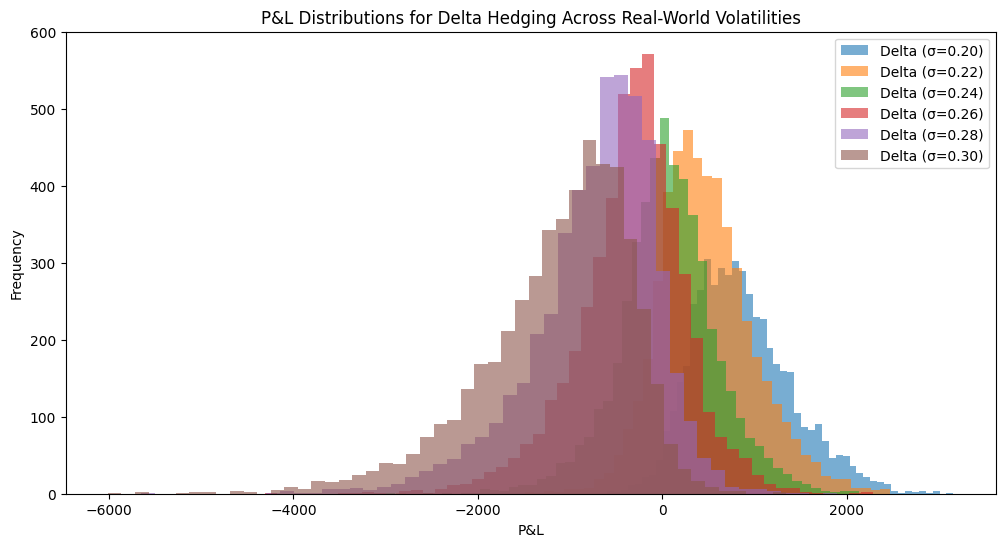

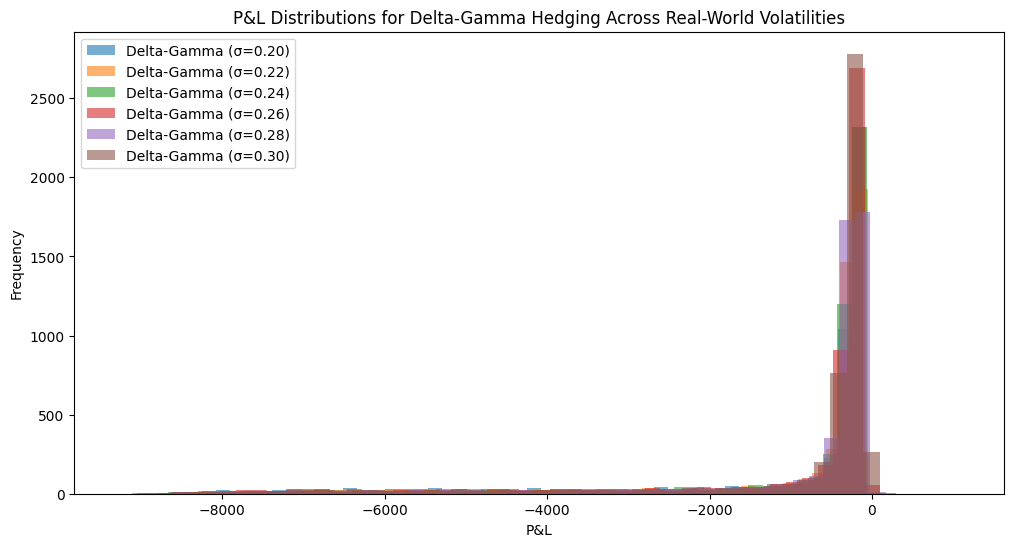

In [ ]:
import matplotlib.pyplot as plt

# Plot Delta PnL distributions for each real-world volatility
plt.figure(figsize=(12, 6))
for sigma_real in real_volatilities:
    plt.hist(delta_pnl_results[sigma_real], bins=50, alpha=0.6, label=f"Delta (σ={sigma_real:.2f})")
plt.xlabel("P&L")
plt.ylabel("Frequency")
plt.title("P&L Distributions for Delta Hedging Across Real-World Volatilities")
plt.legend()
plt.show()

# Plot Delta-Gamma PnL distributions for each real-world volatility
plt.figure(figsize=(12, 6))
for sigma_real in real_volatilities:
    plt.hist(delta_gamma_pnl_results[sigma_real], bins=50, alpha=0.6, label=f"Delta-Gamma (σ={sigma_real:.2f})")
plt.xlabel("P&L")
plt.ylabel("Frequency")
plt.title("P&L Distributions for Delta-Gamma Hedging Across Real-World Volatilities")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import skew

# Compute summary statistics for Delta and Delta-Gamma hedging
summary_stats = []

for sigma_real in real_volatilities:
    delta_mean = delta_pnl_results[sigma_real].mean()
    delta_var = delta_pnl_results[sigma_real].var()
    delta_skew = skew(delta_pnl_results[sigma_real])

    delta_gamma_mean = delta_gamma_pnl_results[sigma_real].mean()
    delta_gamma_var = delta_gamma_pnl_results[sigma_real].var()
    delta_gamma_skew = skew(delta_gamma_pnl_results[sigma_real])

    summary_stats.append({
        "Volatility": sigma_real,
        "Delta Mean": delta_mean,
        "Delta Variance": delta_var,
        "Delta Skewness": delta_skew,
        "Delta-Gamma Mean": delta_gamma_mean,
        "Delta-Gamma Variance": delta_gamma_var,
        "Delta-Gamma Skewness": delta_gamma_skew,
    })

# Convert to DataFrame for display
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,Volatility,Delta Mean,Delta Variance,Delta Skewness,Delta-Gamma Mean,Delta-Gamma Variance,Delta-Gamma Skewness
0,0.20,872.142666,285922.640902,0.589382,-1222.948580,4.067516e+06,-2.048555
1,0.22,478.524018,263189.513832,0.381105,-1120.393399,3.740636e+06,-2.251291
2,0.24,62.650243,285400.600067,-0.144719,-1078.909728,3.555560e+06,-2.348763
3,0.26,-331.324765,352470.237563,-0.572101,-1046.643629,3.396455e+06,-2.401627
4,0.28,-728.792514,473564.908964,-1.013261,-957.515211,3.034833e+06,-2.656274
5,0.30,-1138.788729,663463.889238,-1.051126,-939.087257,3.037085e+06,-2.713410


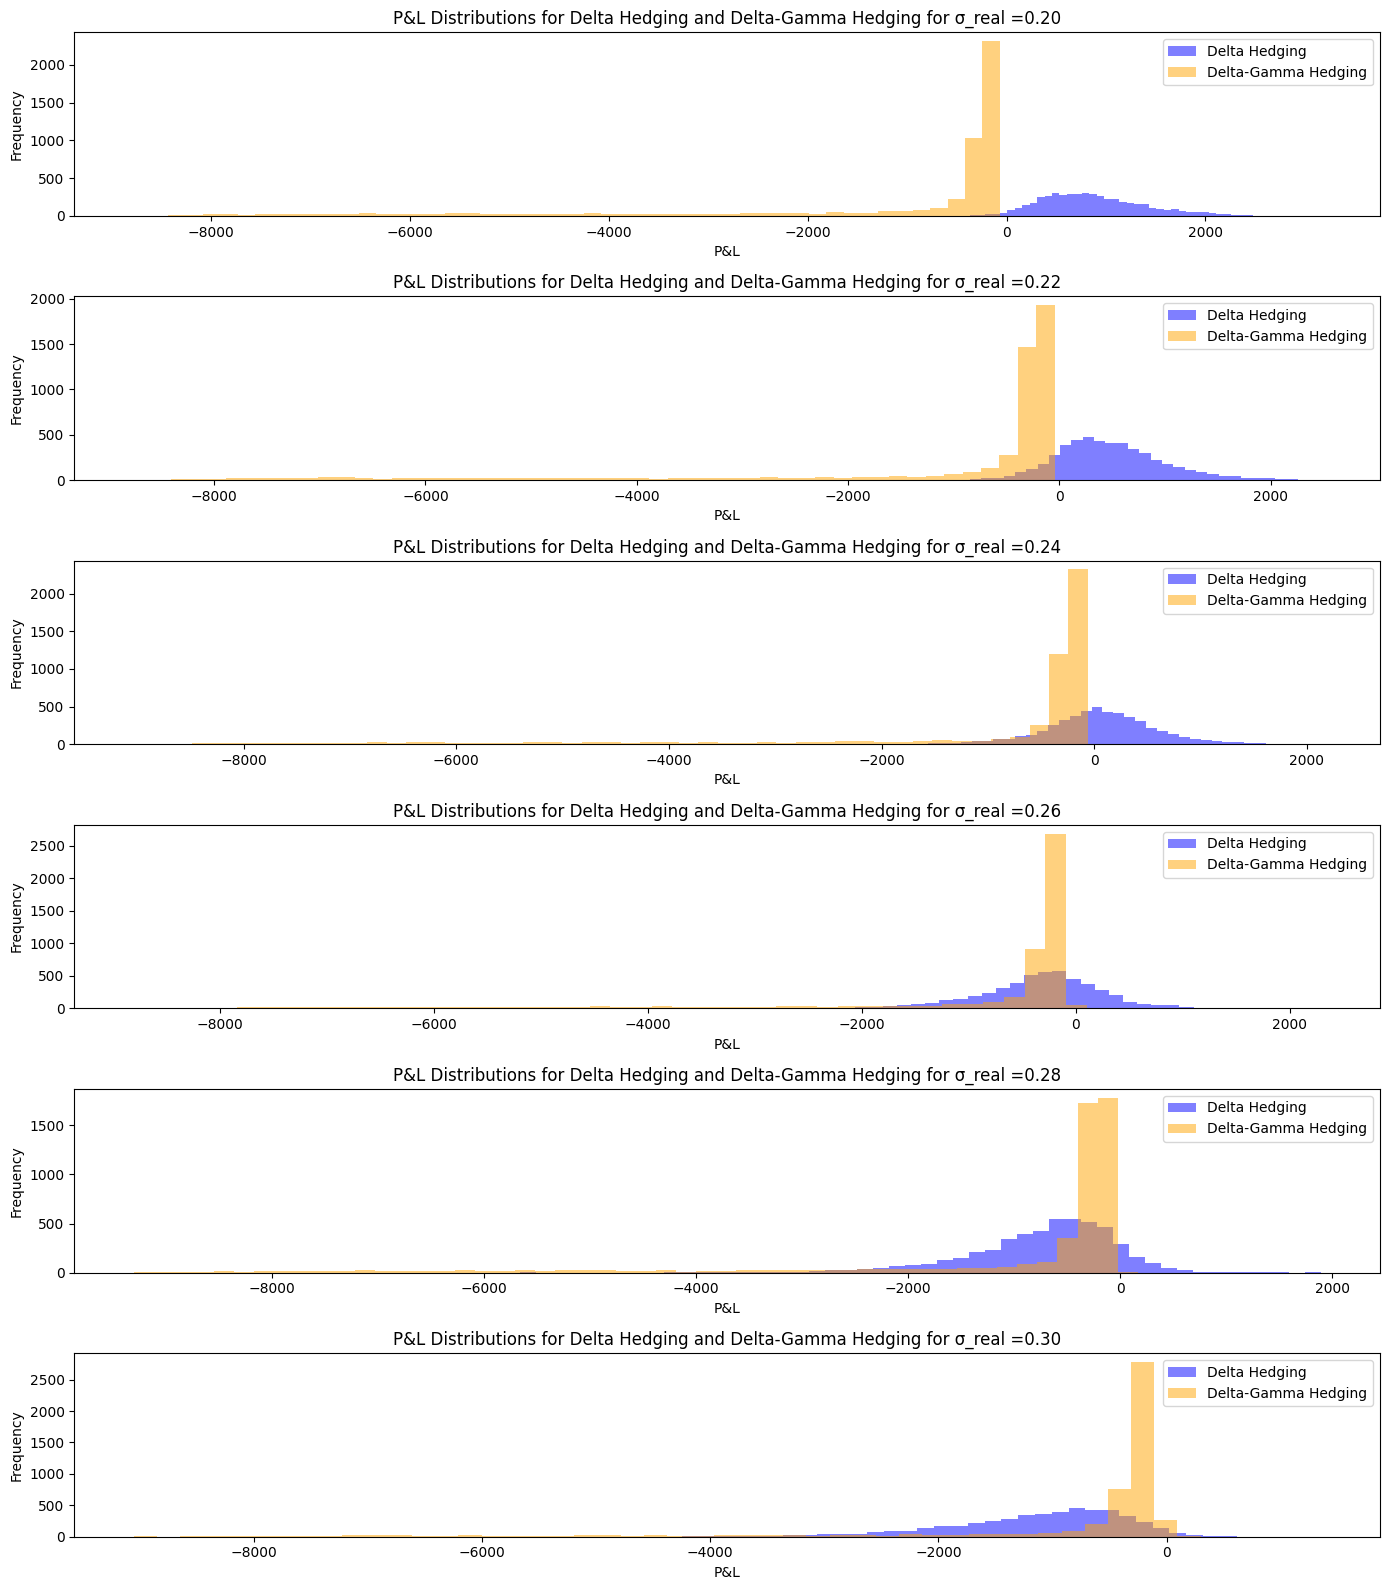

In [ ]:
plt.figure(figsize=(14, 16))

# Create a subplot for each sigma_real
for idx, sigma_real in enumerate(real_volatilities):
    plt.subplot(len(real_volatilities), 1, idx + 1)
    plt.hist(delta_pnl_results[sigma_real], bins=50, alpha=0.5, label="Delta Hedging", color='blue')
    plt.hist(delta_gamma_pnl_results[sigma_real], bins=50, alpha=0.5, label="Delta-Gamma Hedging", color='orange')
    plt.title(f"P&L Distributions for Delta Hedging and Delta-Gamma Hedging for σ_real ={sigma_real:.2f}")
    plt.xlabel("P&L")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()
